<a href="https://colab.research.google.com/github/nitvishnoi/SentimentBasedProductRecommendationSystem/blob/main/Capstone_Sentiment_Based_Product_Recommendation_System_NitinV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

#####Data sourcing and sentiment analysis

#####Building a recommendation system

##### Improving the recommendations using the sentiment analysis model
##### Deploying the end-to-end project with a user interface
 

Data sourcing and sentiment analysis
In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 

# Install necessary packages

In [1]:
#Install required libraries 
#!pip install nltk 
#!pip install matplotlib
#!pip install mlxtend
#!pip install seaborn
#!pip install wordcloud
#!pip install imblearn
#!pip install xgboost
#!pip install sklearn
#!pip install spacy

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from PIL import Image
import sklearn 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings("ignore")
     

In [3]:
#download nltk libraries required 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Importing Input Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Upgrad/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 complaints.json
 env.yml
 Gesture_Recognition_Case-Study_final.ipynb
 macron.jpg
 MLOpsAssignment
 Project-2
 Project_data
 Project_data_gesture
 sample30.csv
'Skin cancer ISIC The International Skin Imaging Collaboration'
 Upgrad
 Yolo_Custom_Model


In [5]:
# Reading the csv file and putting it into 'df' object.
#data_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQYEcAEM_yOk5W6dk3Z-SFmQfeM-Dcoan3l8vCVpOJdjV6Q50zJM4EI5_2ZNYQub5nY7-jouXa_M6-n/pub?output=csv"
data_url = "/content/drive/MyDrive/Upgrad/sample30.csv"
df = pd.read_csv(data_url, parse_dates=True)

### 3. Understanding the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
df.shape

(30000, 15)

In [8]:
# converting reviews to str dtype 
df['reviews_username'] = df['reviews_username'].astype(str)

In [9]:
df.dtypes

id                      object
brand                   object
categories              object
manufacturer            object
name                    object
reviews_date            object
reviews_didPurchase     object
reviews_doRecommend     object
reviews_rating           int64
reviews_text            object
reviews_title           object
reviews_userCity        object
reviews_userProvince    object
reviews_username        object
user_sentiment          object
dtype: object

In [10]:
# Rating  - Basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
reviews_rating,30000.0,4.483133,0.988441,1.0,4.0,5.0,5.0,5.0


In [11]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [12]:
df.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


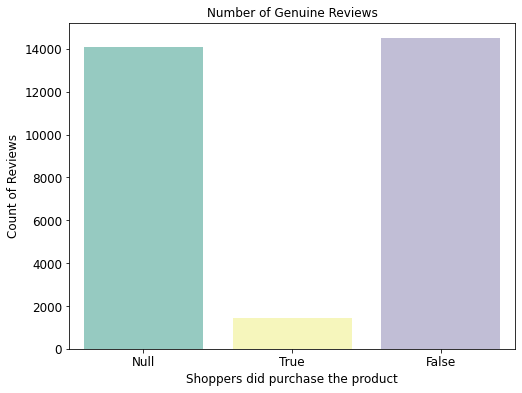

In [13]:
#on the reviews_didpurchase column, replace null values with "Null"
df['reviews_didPurchase'].fillna('Null', inplace=True)

#checking distribution of reviews_didpurchased

plt.figure(figsize=(8,6))
#sns.set_theme(style="darkgrid")
pl = sns.countplot(df['reviews_didPurchase'],palette="Set3")
pl.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=12)
pl.set_ylabel(ylabel='Count of Reviews', fontsize=12)
pl.axes.set_title('Number of Genuine Reviews', fontsize=12)
pl.tick_params(labelsize=12)
plt.show()

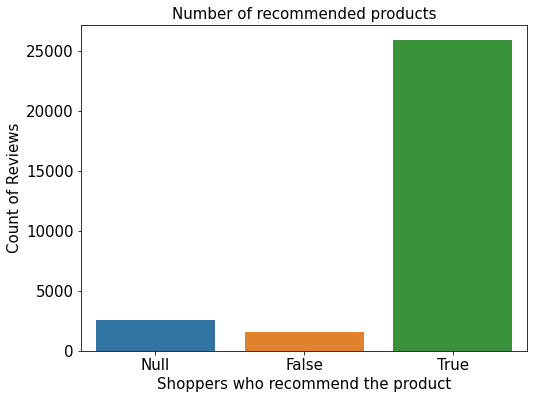

In [14]:
#on the reviews_doRecommend column, replace null values with "Null"
df['reviews_doRecommend'].fillna('Null', inplace=True)
#checking distribution of reviews_didpurchased

plt.figure(figsize=(8,6))
pl = sns.countplot(df['reviews_doRecommend'])
pl.set_xlabel(xlabel="Shoppers who recommend the product", fontsize=15)
pl.set_ylabel(ylabel='Count of Reviews', fontsize=15)
pl.axes.set_title('Number of recommended products', fontsize=15)
pl.tick_params(labelsize=15)
plt.show()

In [15]:
df['reviews_doRecommend'].value_counts()

True     25880
Null      2570
False     1550
Name: reviews_doRecommend, dtype: int64

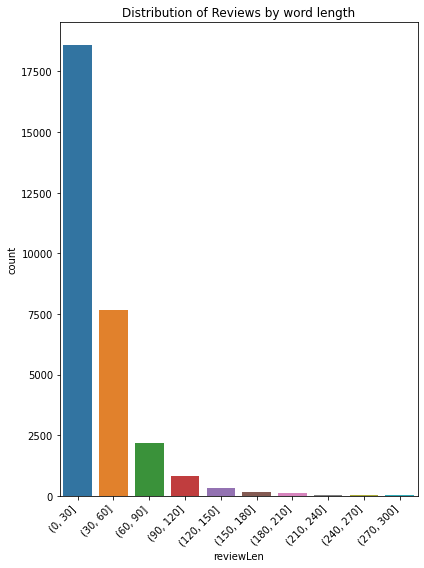

In [16]:
#Visualization of word reviews by length
f = plt.figure(figsize=(6,8))
df_reviews = df[['id','reviews_username','reviews_text','reviews_title','reviews_rating']]
df_reviews['reviewLen'] = df_reviews['reviews_text'].apply(lambda x: len(x.split()))

reviews_len = df_reviews.groupby(pd.cut(df_reviews.reviewLen, np.arange(0,330,30))).count()
reviews_len = reviews_len.rename(columns={'reviewLen':'count'})
reviews_len = reviews_len.reset_index()

reviewLenChart = sns.barplot(x='reviewLen',y='count',data=reviews_len)
reviewLenChart.set_title('Distribution of Reviews by word length')
reviewLenChart.set_xticklabels(reviewLenChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

f.tight_layout()

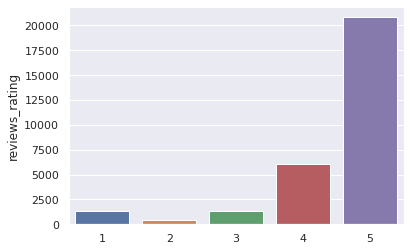

In [17]:
sns.set(rc={"figure.figsize":(6, 4)})
sns.barplot(x=df.reviews_rating.value_counts().index, y=df.reviews_rating.value_counts())

### 4. Data Cleaning

#### 4.1 Missing % of each column

In [18]:
# Check for missing values percentage in different columns
def checkMissingPercentage(df):
    nullVal = []
    for i in df.isnull().sum()*100/df.shape[0]:
        nullVal.append(i)
    data = {'columns': list(df), 'null_%': nullVal}
    df_null = pd.DataFrame(data)
    df_null= df_null[df_null['null_%'] != 0]
    df_null=df_null.sort_values(by='null_%', ascending=False, inplace=False)
    display(df_null)
    return df_null

In [19]:
dfNotNull = checkMissingPercentage(df)

,columns,null_%
12,reviews_userProvince,99.433333
11,reviews_userCity,93.570000
10,reviews_title,0.633333
3,manufacturer,0.470000
5,reviews_date,0.153333
14,user_sentiment,0.003333


### 4.2 Dropping columns with missing values more than 25 %

In [20]:
list(dfNotNull[dfNotNull["null_%"] > 25]["columns"])

['reviews_userProvince', 'reviews_userCity']

 ### 4.3 Dropping the fields which have very high percentage of missing data

In [21]:
dfNotNull = df.drop(list(dfNotNull[dfNotNull["null_%"] > 25]["columns"]), axis = 1)

In [22]:
# checking null values again
round(100*dfNotNull.isnull().sum()/len(dfNotNull),3)

id                     0.000
brand                  0.000
categories             0.000
manufacturer           0.470
name                   0.000
reviews_date           0.153
reviews_didPurchase    0.000
reviews_doRecommend    0.000
reviews_rating         0.000
reviews_text           0.000
reviews_title          0.633
reviews_username       0.000
user_sentiment         0.003
dtype: float64

### 4.4 Dropping Null value rows from user_sentiment

In [23]:
dfNotNull = dfNotNull[dfNotNull['user_sentiment'].notna()]

### 4.5 Now selecting columns which are Relevant for the Analysis

In [24]:
df_relevant= dfNotNull[['id','brand', 'categories', 'manufacturer', 'name',
       'reviews_doRecommend', 'reviews_rating', 'reviews_text',
       'reviews_title', 'reviews_username', 'user_sentiment']]

### 4.6 Now Mapping categorical to 1/0

In [25]:
df_relevant['reviews_doRecommend'] = df_relevant['reviews_doRecommend'].map(dict([(False,0),(True,1)]))

In [26]:
df_relevant['user_sentiment'] = df_relevant['user_sentiment'].map(dict([('Negative',0),('Positive',1)]))

# 5 EDA

### 5.1 Check for ratings accross the data

In [27]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29999 non-null  object 
 1   brand                29999 non-null  object 
 2   categories           29999 non-null  object 
 3   manufacturer         29858 non-null  object 
 4   name                 29999 non-null  object 
 5   reviews_doRecommend  27429 non-null  float64
 6   reviews_rating       29999 non-null  int64  
 7   reviews_text         29999 non-null  object 
 8   reviews_title        29809 non-null  object 
 9   reviews_username     29999 non-null  object 
 10  user_sentiment       29999 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.7+ MB


In [28]:
df_relevant['reviews_rating'].value_counts() 

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

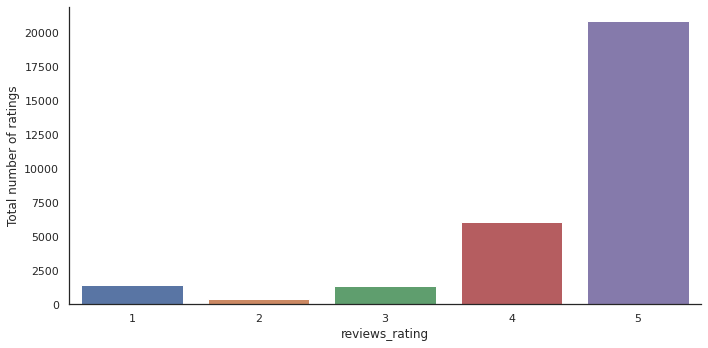

In [29]:
with sns.axes_style('white'):
    g = sns.catplot( x='reviews_rating', data=df_relevant, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

### 5.2 Checking for Unique Users and products

In [30]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",df_relevant.shape[0])
print("Total No of Users   :", len(np.unique(df_relevant.reviews_username)))
print("Total No of products  :", len(np.unique(df_relevant.name)))

Total data 
--------------------------------------------------

Total no of ratings : 29999
Total No of Users   : 24915
Total No of products  : 271


### 5.3 Now checking for Ratings

In [31]:
no_of_rated_products_per_user = df_relevant.groupby(by='reviews_username')['reviews_rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()
     

reviews_username
nan                  63
mike                 41
byamazon customer    41
chris                32
lisa                 16
Name: reviews_rating, dtype: int64

In [32]:
no_of_rated_products_per_user.describe()

count    24915.000000
mean         1.204054
std          0.864706
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         63.000000
Name: reviews_rating, dtype: float64

In [33]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

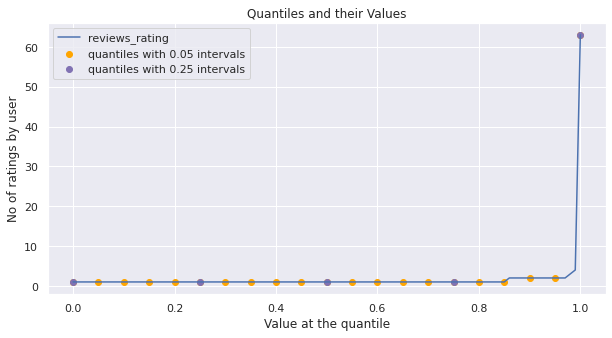

In [34]:

plt.figure(figsize=(10,5))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [35]:
print('\n No of rated product more than 15 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 15)) )


 No of rated product more than 15 per user : 8



# 6. Data Preprocessing

### 6.1 Doing Preprocessing the Reviews_text - Lowering the case

In [36]:
df_relevant['reviews_text']=df_relevant['reviews_text'].str.lower() 
# to make all letters lower  - For computers, 'Book' is not same word with 'book'. So, I will convert every letter in the tex

### 6.2 Doing Preprocessing the Reviews_text - Removing the punctuation

In [37]:
import string
string.punctuation # to see punctuation library of string function

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_without_punc = "".join([c for c in text if c not in string.punctuation])
    return text_without_punc

### 6.3 Now removing punctuation & adding review header & review text after cleaning to a new column

In [39]:
df_relevant['reviews_text_clean'] = df_relevant['reviews_text'].apply(lambda x: remove_punctuation(str(x))) + ' ' + df['reviews_text'].apply(lambda x: remove_punctuation(x))

### 6.4 Getting Cleaned data information

In [40]:
df_relevant['reviews_text_clean']

0        i love this album its very good more to the hi...
1        good flavor this review was collected as part ...
2                                  good flavor Good flavor
3        i read through the reviews on here before look...
4        my husband bought this gel for us the gel caus...
                               ...                        
29995    i got this conditioner with influenster to try...
29996    i love it  i received this for review purposes...
29997    first of all i love the smell of this product ...
29998    i received this through influenster and will n...
29999    i received this product complimentary from inf...
Name: reviews_text_clean, Length: 29999, dtype: object

In [41]:
df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   29999 non-null  object 
 1   brand                29999 non-null  object 
 2   categories           29999 non-null  object 
 3   manufacturer         29858 non-null  object 
 4   name                 29999 non-null  object 
 5   reviews_doRecommend  27429 non-null  float64
 6   reviews_rating       29999 non-null  int64  
 7   reviews_text         29999 non-null  object 
 8   reviews_title        29809 non-null  object 
 9   reviews_username     29999 non-null  object 
 10  user_sentiment       29999 non-null  int64  
 11  reviews_text_clean   29999 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.0+ MB


In [42]:
df_relevant.head(5)

,id,brand,categories,manufacturer,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_text_clean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,i love this album its very good more to the hi...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,good flavor. this review was collected as part...,Good,dorothy w,1,good flavor this review was collected as part ...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,good flavor.,Good,dorothy w,1,good flavor Good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,0.0,1,i read through the reviews on here before look...,Disappointed,rebecca,0,i read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,0.0,1,my husband bought this gel for us. the gel cau...,Irritation,walker557,0,my husband bought this gel for us the gel caus...


### 6.5 Removing STOP words 

In [43]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

{'it', 'yours', 'of', "you'll", 'its', 'my', 'about', 'own', 'wouldn', 'they', 'had', 'most', 'further', 'so', 't', 'he', 'needn', 'his', 'against', 'nor', "weren't", 'doesn', 'was', 'out', 'does', 'ain', 'these', 'all', 'what', 'isn', 'be', 'such', 'again', 'over', 'if', "shan't", 'their', 'yourselves', 'an', 'there', 'yourself', 'because', 'is', "haven't", 'at', 've', 'been', 'until', 'm', 'hadn', 'once', 'how', 'd', 'themselves', 'have', 'with', 'from', 'ma', 'not', 'our', "couldn't", 'as', 'your', 'that', 'above', 'just', "needn't", 'should', 'under', 'won', 'while', 'why', 'more', 'are', 'but', 'theirs', 'between', 'ourselves', 'when', 'am', 're', "shouldn't", 'you', "wasn't", 'can', 'we', 'the', 'wasn', 'ours', 'hers', 'below', 'where', 'me', 'on', 'into', 'only', 'couldn', 'she', "that'll", 'those', 'or', 'will', 'down', 'before', 'aren', 'which', 'now', "wouldn't", "hadn't", 'in', 'some', 'after', 'each', 'up', "don't", 'll', 'haven', 'hasn', 'a', "mustn't", 'for', 'do', 'too',

In [44]:
# Function to remove the stopwords
def remove_stopwords(sent):
    sent = sent.lower() # Text to lowercase
    #print(sent)
    words = word_tokenize(sent) # Split sentences into words
    #print(words)
    text_nostopwords = " ".join( [each_word for each_word in words if each_word not in stopwords_set] )
    #print(text_nostopwords)
    return text_nostopwords

In [45]:
df_relevant['reviews_without_stopwords'] = df_relevant['reviews_text_clean'].apply(remove_stopwords)

In [46]:
df_relevant['reviews_without_stopwords']

0        love album good hip hop side current pop sound...
1        good flavor review collected part promotion go...
2                                  good flavor good flavor
3        read reviews looking buying one couples lubric...
4        husband bought gel us gel caused irritation fe...
                               ...                        
29995    got conditioner influenster try im loving far ...
29996    love received review purposes influenster leav...
29997    first love smell product wash hair smooth easy...
29998    received influenster never go back anything el...
29999    received product complimentary influenster rea...
Name: reviews_without_stopwords, Length: 29999, dtype: object

In [47]:
df_relevant.head(5)

,id,brand,categories,manufacturer,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_text_clean,reviews_without_stopwords
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),NaN,5,i love this album. it's very good. more to the...,Just Awesome,joshua,1,i love this album its very good more to the hi...,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,good flavor. this review was collected as part...,Good,dorothy w,1,good flavor this review was collected as part ...,good flavor review collected part promotion go...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,NaN,5,good flavor.,Good,dorothy w,1,good flavor Good flavor,good flavor good flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,0.0,1,i read through the reviews on here before look...,Disappointed,rebecca,0,i read through the reviews on here before look...,read reviews looking buying one couples lubric...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,0.0,1,my husband bought this gel for us. the gel cau...,Irritation,walker557,0,my husband bought this gel for us the gel caus...,husband bought gel us gel caused irritation fe...


### 6.6. Now using lemmatization on text

In [48]:
import re, nltk, spacy, string
import en_core_web_sm
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])

In [49]:
#Function to lemmatize the text
def lemmatized_text(text):
    sentences = []
    doc = nlp(text)
    for token in doc:
        sentences.append(token.lemma_)
    return " ".join(sentences)

In [50]:
df_relevant['lemmatized_reviews'] = df_relevant['reviews_without_stopwords'].apply(lemmatized_text)

### 6.7 Creating Positive sentiment Wordcloud

In [51]:
stop_words = set(STOPWORDS) # setting stop words

In [52]:
df_pos = df_relevant.loc[df_relevant['user_sentiment']==1] # positive reviews dataframe

In [53]:
# assigning word cloud 
wordcloud = WordCloud(background_color='black', stopwords = stop_words,max_words = 500,
                    max_font_size = 100, random_state = 42, width=600, height=300)
     

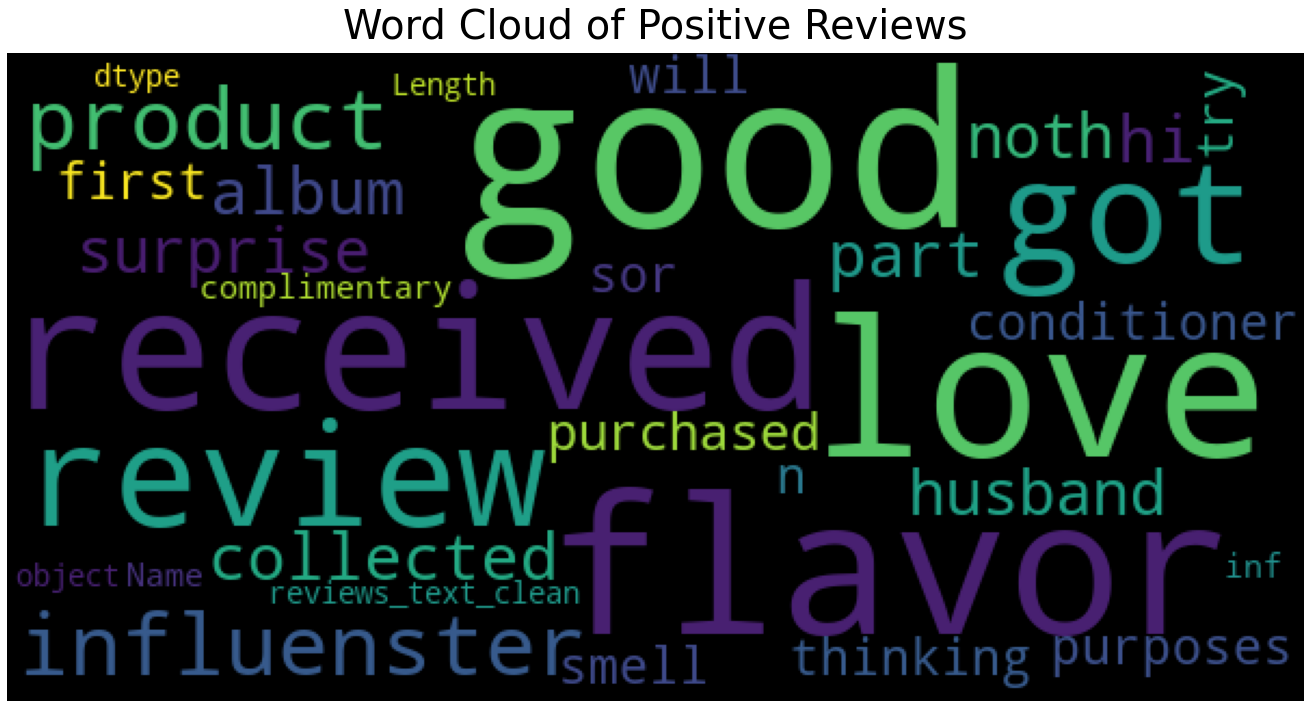

In [54]:
# to see the positive reviews wordcloud
wordcloud.generate(str(df_pos['reviews_text_clean']))
plt.figure(figsize=(20.0,10.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

### 6.8 Creating Negative sentiment Wordcloud

In [55]:
df_neg = df_relevant.loc[df_relevant['user_sentiment']==0] # Negative reviews dataframe

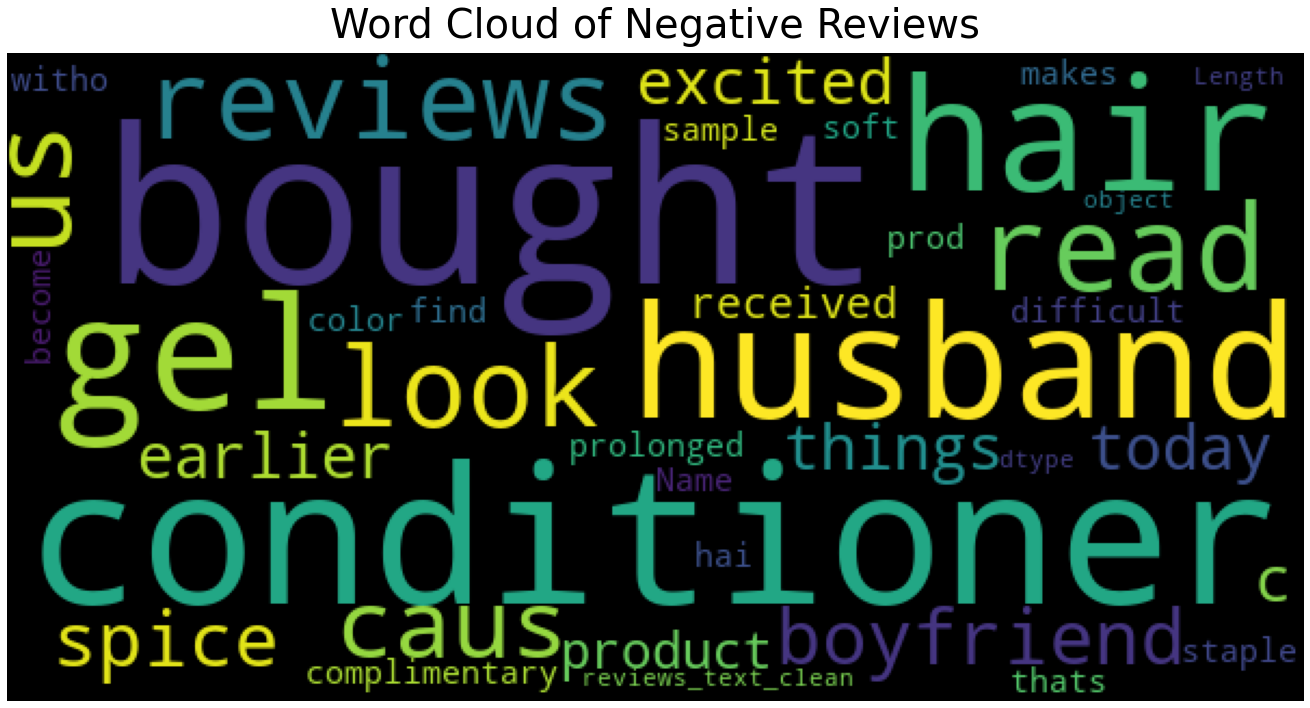

In [56]:
# to see the Negative reviews wordcloud
wordcloud.generate(str(df_neg['reviews_text_clean']))
plt.figure(figsize=(20.0,10.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout() 

#### 6.9 Now using Custom functions to Look Most Common Positive and Negative Words

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
def word_count(reviews):
    '''This function tokenize and count the words in text'''
    word_num={}
    for i in reviews:
        token = nltk.word_tokenize(i)
        for t in token:
            if t not in word_num.keys():
                word_num[t] = 1
            else:
                word_num[t] += 1  
    return word_num

#### 6.9.1 Getting Top 25 Common Words List in Positive Reviews

In [60]:
## Top 25 Common Words List in Positive Reviews
word_frequency=word_count(df_pos['reviews_text_clean']) #tokenize and count and create dictionary

In [61]:
# to create dataframe from most common words dictionary

df_pos_count = pd.DataFrame(columns=['word', 'count'])
df_pos_count['word'] = word_frequency.keys()
df_pos_count['count'] = list(word_frequency.values())
df_pos_count=df_pos_count.sort_values(by=['count'], ascending=False)
df_pos_count=df_pos_count.reset_index(drop=True)

In [62]:
stop = set(stopwords.words("english")) #setting stopwords

In [63]:
# taking only words which are not stopwords
df_pos_count['word_without_stop'] = df_pos_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [64]:
df_pos_without_stop = df_pos_count.dropna(subset=['word_without_stop'])

In [65]:
df_top_25_pos = df_pos_count.loc[df_pos_count['word_without_stop']!=''].head(25)

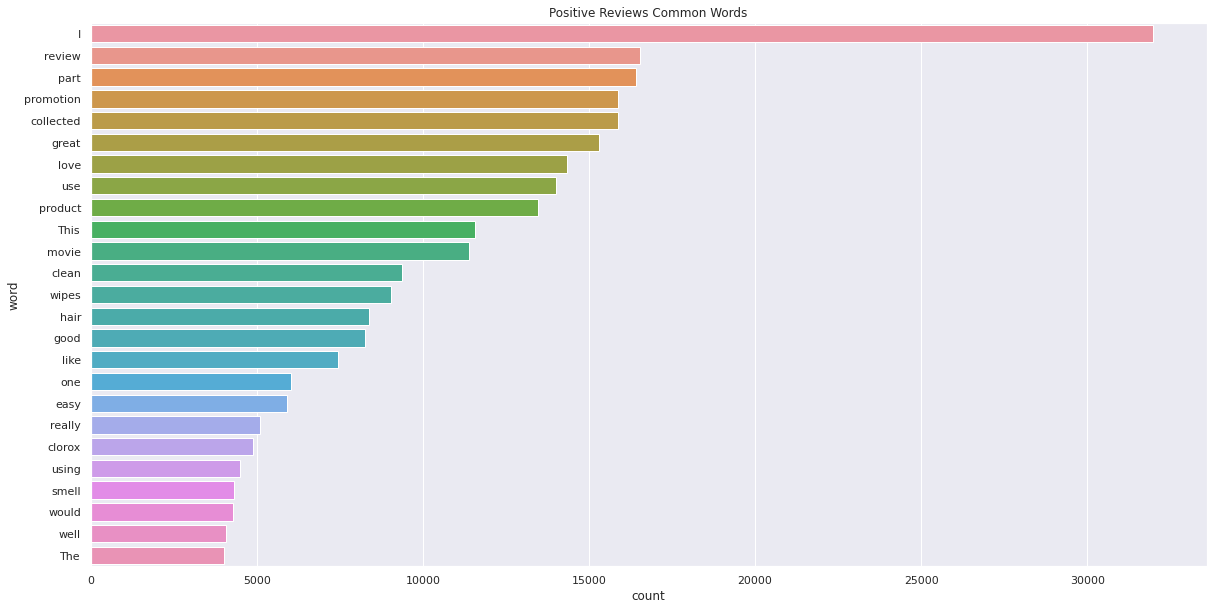

In [66]:
plt.figure(figsize=(20,10))
plt.title('Positive Reviews Common Words')
sns.barplot(y="word",x="count", data=df_top_25_pos)

### 6.9.2 Now getting Top 25 Common Words List in Negative Reviews

In [67]:
word_frequency_neg=word_count(df_neg['reviews_text_clean'])

In [68]:
df_neg_count = pd.DataFrame(columns=['word', 'count'])
df_neg_count['word'] = word_frequency_neg.keys()
df_neg_count['count'] = list(word_frequency_neg.values())
df_neg_count=df_neg_count.sort_values(by=['count'], ascending=False)
df_neg_count=df_neg_count.reset_index(drop=True)

In [69]:
df_neg_count['word_without_stop'] = df_neg_count['word'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))

In [70]:
df_neg_without_stop = df_neg_count.dropna(subset=['word_without_stop'])
df_top_25_neg = df_neg_count.loc[df_neg_count['word_without_stop']!=''].head(25)

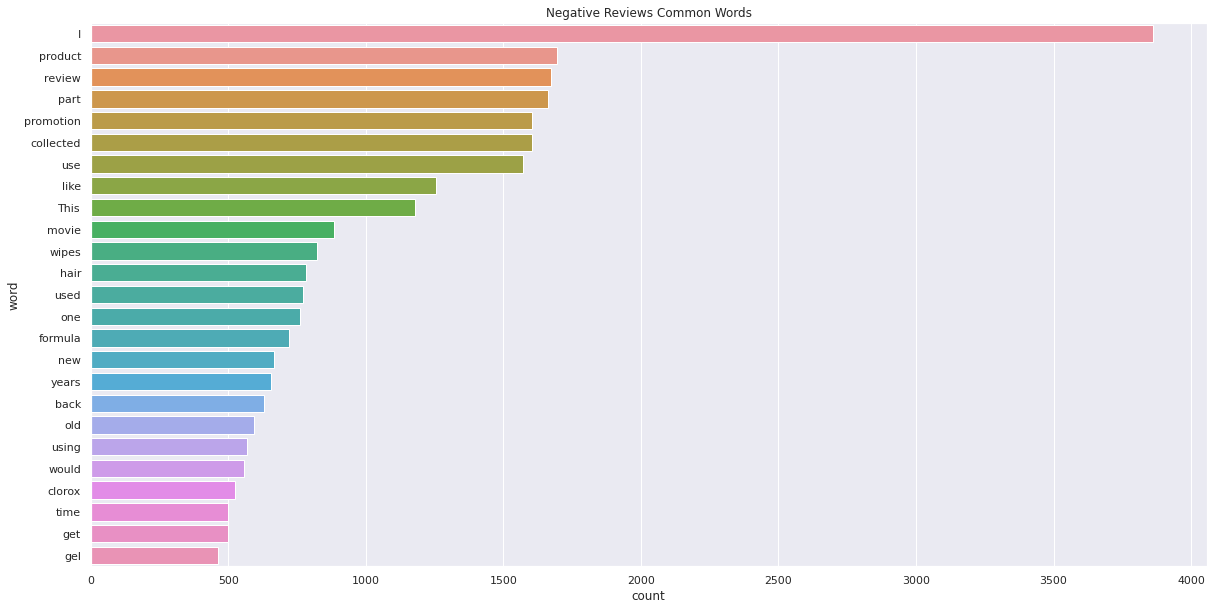

In [71]:
plt.figure(figsize=(20,10))
plt.title('Negative Reviews Common Words')
sns.barplot(y= "word",x="count", data=df_top_25_neg)

# 7. Savning Cleaned data in pickel file form

In [72]:
# saving pickle filr
import pickle as pickle
pickle.dump(df_relevant, open("cleaned-data.pkl","wb"))

# 8. Doing Train, Test and Split of cleaned data for modeling

In [73]:
 # split train-test
X_train, X_test, y_train, y_test = train_test_split(df_relevant['lemmatized_reviews'], df_relevant['user_sentiment'], test_size=0.2, random_state=31)
print(X_train.shape)
print(X_test.shape)

(23999,)
(6000,)


In [74]:
 # define vectorize and fit to data     
word_vectorizer = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',
        analyzer='word',token_pattern=r'\w{1,}',stop_words='english',
        ngram_range=(1, 1),max_features=10000)

word_vectorizer.fit(df_relevant['reviews_text_clean'])
    
# train - test vectorized features
train_word_features = word_vectorizer.transform(X_train)
test_word_features = word_vectorizer.transform(X_test)

In [75]:
# oversampling - to handle data imbalance
sm = SMOTE(random_state = 2,sampling_strategy='auto')
train_word_features, y_train = sm.fit_resample(train_word_features, y_train)

In [76]:
print(train_word_features.shape)
print(y_train.shape)

(42634, 10000)
(42634,)


# 9. Function for Creating a method for confusion matrix and scores

In [77]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
def display_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    plot_confusion_matrix(classifier, X_test, y_test,include_values=True,values_format='g',cmap=plt.cm.Blues) 
    print(classifier)
    print('\n')
    print('Accuracy is ', accuracy_score(y_test, classifier.predict(X_test)))
    print('Sensitivity is {}'.format(cm[1][1]/sum(cm[1])))
    print('Specificity is {}'.format(cm[0][0]/sum(cm[0])))

In [78]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# 10. Modeling

# 10.1 Logistic Regression modelling

In [79]:
 classifier = LogisticRegression(class_weight = "balanced") #, C=0.5, solver='sag')

In [80]:
# Hyperparameter Tuning
C = [(x) for x in np.logspace(start = 0 , stop = 4, num = 11)] # returns 11 numbers 
penalty = ["l1","l2"]
solver = ["liblinear", "saga"]
r_grid = {'C': C, 'penalty': penalty, 'solver': solver}

In [81]:
grid = {"C":np.logspace(-3,3,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv = RandomizedSearchCV(estimator=classifier, param_distributions= r_grid, cv=3, n_iter = 20, scoring='f1', verbose=2, random_state=31, n_jobs=-1, return_train_score=True)
logreg_cv.fit(train_word_features,y_train.values.ravel())

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1.0, 2.51188643150958,
                                              6.309573444801933,
                                              15.848931924611142,
                                              39.810717055349734, 100.0,
                                              251.18864315095823,
                                              630.9573444801937,
                                              1584.893192461114,
                                              3981.0717055349733, 10000.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=31, return_train_score=True, scoring='f1',
                   verbose=2)

In [82]:
print_results(logreg_cv)

BEST PARAMS: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100.0}

0.935 (+/-0.011) for {'solver': 'liblinear', 'penalty': 'l1', 'C': 1584.893192461114}
0.938 (+/-0.012) for {'solver': 'liblinear', 'penalty': 'l1', 'C': 251.18864315095823}
0.928 (+/-0.015) for {'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
0.925 (+/-0.016) for {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.94 (+/-0.016) for {'solver': 'saga', 'penalty': 'l1', 'C': 2.51188643150958}
0.946 (+/-0.013) for {'solver': 'saga', 'penalty': 'l2', 'C': 1584.893192461114}
0.947 (+/-0.012) for {'solver': 'saga', 'penalty': 'l2', 'C': 39.810717055349734}
0.944 (+/-0.012) for {'solver': 'liblinear', 'penalty': 'l2', 'C': 630.9573444801937}
0.945 (+/-0.015) for {'solver': 'saga', 'penalty': 'l1', 'C': 6.309573444801933}
0.946 (+/-0.013) for {'solver': 'saga', 'penalty': 'l1', 'C': 10000.0}
0.946 (+/-0.014) for {'solver': 'saga', 'penalty': 'l1', 'C': 15.848931924611142}
0.946 (+/-0.015) for {'solver': 'liblinear', 'penalty'

In [83]:
 # calculating results 
lr_model = LogisticRegression(class_weight = "balanced", **logreg_cv.best_params_)
lr_model.fit(train_word_features,y_train)

LogisticRegression(C=100.0, class_weight='balanced', solver='liblinear')

In [84]:
y_pred_train = lr_model.predict(train_word_features)
y_pred = lr_model.predict(test_word_features)

In [85]:
print(lr_model.score(test_word_features , y_test))

0.9066666666666666


In [86]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")


Accuracy:
TRAIN: 0.9835811793404325
TEST: 0.9066666666666666


In [87]:
print("F1-Score:"); print("="*len("F1-Score:"))
print(f"TRAIN: {f1_score(y_train, y_pred_train)}")
print(f"TEST: {f1_score(y_test, y_pred)}")

F1-Score:
TRAIN: 0.9834851130090124
TEST: 0.9464114832535885


In [88]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 495  190]
 [ 370 4945]]


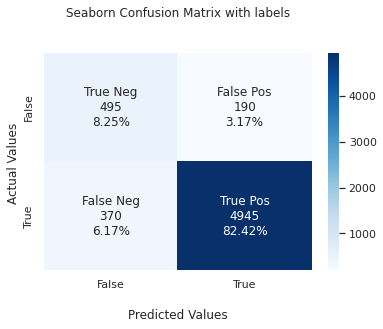

In [89]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [90]:
# saving the model
pickle.dump(lr_model, open('sentiment-classification-logistic-regression-model.pkl', 'wb'))
pickle.dump(word_vectorizer, open("tfidf-vectorizer.pkl", "wb"))

In [91]:
tfs=pd.read_pickle('tfidf-vectorizer.pkl')
mdl=pd.read_pickle('sentiment-classification-logistic-regression-model.pkl')

In [92]:
mdl

LogisticRegression(C=100.0, class_weight='balanced', solver='liblinear')

In [93]:
tfs

TfidfVectorizer(max_features=10000, stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

# 8.2 Random Forest Model

In [94]:
 # choosing and fitting classifier
classifier = RandomForestClassifier(class_weight = "balanced")

In [95]:
 # Hyperparameter Tuning
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] # returns 10 numbers 
max_features = ['auto', 'log2']
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]
r_grid = {'n_estimators': n_estimators,

            'max_features': max_features,

            'max_depth': max_depth,

            'bootstrap': bootstrap}

In [96]:
cv= RandomizedSearchCV(estimator=classifier, param_distributions=r_grid, n_iter = 20, scoring='f1', 
                      cv = 3, verbose=2, random_state=31, n_jobs=-1, return_train_score=True)
cv.fit(train_word_features,y_train.values.ravel())
print_results(cv)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
BEST PARAMS: {'n_estimators': 11, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

0.956 (+/-0.02) for {'n_estimators': 15, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
0.732 (+/-0.04) for {'n_estimators': 9, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': False}
0.455 (+/-0.267) for {'n_estimators': 8, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': True}
0.93 (+/-0.009) for {'n_estimators': 6, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
0.395 (+/-0.086) for {'n_estimators': 6, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': False}
0.945 (+/-0.016) for {'n_estimators': 10, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
0.582 (+/-0.051) for {'n_estimators': 15, 'max_features': 'log2', 'max_depth': 5, 'bootstrap': False}
0.959 (+/-0.025) for {'n_estimators': 9, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
0.463 (+/-0.198) for {'n

In [97]:
# calculating results 
y_pred_train = cv.predict(train_word_features)
y_pred = cv.predict(test_word_features)

best_random = RandomForestClassifier(class_weight = "balanced", **cv.best_params_)
best_random.fit(train_word_features,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       n_estimators=11)

In [98]:
print(best_random.score(test_word_features , y_test))

0.9073333333333333


In [99]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

Accuracy:
TRAIN: 0.999530890838298
TEST: 0.9058333333333334


In [100]:
print("F1-Score:"); print("="*len("F1-Score:"))
print(f"TRAIN: {f1_score(y_train, y_pred_train)}")
print(f"TEST: {f1_score(y_test, y_pred)}")

F1-Score:
TRAIN: 0.9995306926975784
TEST: 0.9476221377584129


In [101]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 324  361]
 [ 204 5111]]


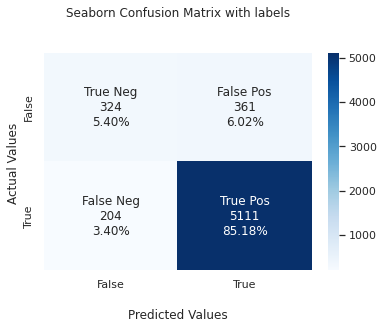

In [102]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 8.3  Naive Bayes Model

In [103]:
 # choosing and fitting classifier
classifier = GaussianNB()

In [104]:
 # Hyperparameter Tuning
param_dist = {
'var_smoothing': np.logspace(0,-5, num=100)
}


cv = RandomizedSearchCV(estimator = classifier, 
                        param_distributions = param_dist,
                        cv = 3,  
                        n_iter = 10, n_jobs = 1,
                        scoring = 'f1', error_score = 0,
                        verbose = 0, 
                        random_state=31, return_train_score=False)

cv.fit(train_word_features.toarray(),y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'var_smoothing': 0.00041320124001153384}

0.01 (+/-0.004) for {'var_smoothing': 0.1384886371393873}
0.12 (+/-0.039) for {'var_smoothing': 0.021544346900318832}
0.679 (+/-0.013) for {'var_smoothing': 0.000145082877849594}
0.0 (+/-0.0) for {'var_smoothing': 0.7054802310718643}
0.671 (+/-0.006) for {'var_smoothing': 0.001484968262254465}
0.0 (+/-0.0) for {'var_smoothing': 1.0}
0.199 (+/-0.05) for {'var_smoothing': 0.013530477745798068}
0.0 (+/-0.0) for {'var_smoothing': 0.39442060594376555}
0.699 (+/-0.009) for {'var_smoothing': 0.0009326033468832199}
0.701 (+/-0.013) for {'var_smoothing': 0.00041320124001153384}


In [105]:
# calculating results 
y_pred_train = cv.predict(train_word_features.toarray())
y_pred = cv.predict(test_word_features.toarray())

best_nb = GaussianNB(**cv.best_params_)
best_nb.fit(train_word_features.toarray(),y_train.values.ravel())


GaussianNB(var_smoothing=0.00041320124001153384)

In [106]:
print(best_nb.score(test_word_features.toarray() , y_test))

0.5666666666666667


In [107]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

Accuracy:
TRAIN: 0.7866491532579631
TEST: 0.5666666666666667


In [108]:
print("F1-Score:"); print("="*len("F1-Score:"))
print(f"TRAIN: {f1_score(y_train, y_pred_train)}")
print(f"TEST: {f1_score(y_test, y_pred)}")

F1-Score:
TRAIN: 0.7339572974553964
TEST: 0.692889203874321


In [109]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 467  218]
 [2382 2933]]


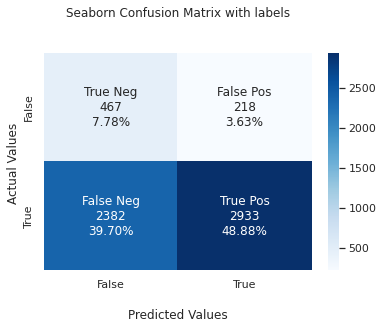

In [110]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 8.4 XGBoost model

In [111]:
from sklearn.model_selection import GridSearchCV
 # choosing and fitting classifier
classifier = xgb.XGBClassifier()

In [112]:
#### Fitting a XGBoost classifier with various custom hyperparameters.

param_grid = {'learning_rate': [0.001, 0.01], 'max_depth':[ 5, 10],  'n_estimators':[1, 3]}

# set up GridSearchCV()
cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv =3, 
                        verbose = 1,
                        return_train_score=True)

cv.fit(train_word_features.toarray(),y_train.values.ravel())
print_results(cv)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}

0.824 (+/-0.002) for {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 1}
0.824 (+/-0.002) for {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 3}
0.875 (+/-0.008) for {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 1}
0.875 (+/-0.009) for {'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 3}
0.824 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1}
0.828 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 3}
0.875 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1}
0.882 (+/-0.008) for {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 3}


In [113]:
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, y_pred_train)}")
print(f"TEST: {accuracy_score(y_test, y_pred)}")

Accuracy:
TRAIN: 0.7866491532579631
TEST: 0.5666666666666667


In [114]:
print("F1-Score:"); print("="*len("F1-Score:"))
print(f"TRAIN: {f1_score(y_train, y_pred_train)}")
print(f"TEST: {f1_score(y_test, y_pred)}")

F1-Score:
TRAIN: 0.7339572974553964
TEST: 0.692889203874321


### 8.4.2 Displaying Confusion matrix Scores

In [115]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[ 467  218]
 [2382 2933]]


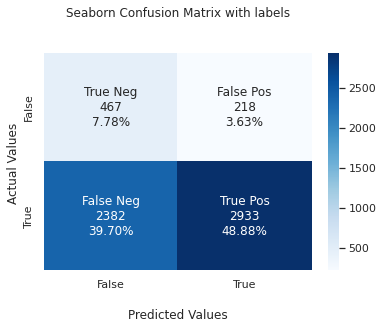

In [116]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 9. Model Comparision and summary of the models created

In [117]:
results = {('LR'):[0.98, 0.91, 0.98, 0.95], ('RF'):[0.99, 0.90, 0.99, 0.94], ('NB'):[0.79, 0.57, 0.73, 0.69], ('XGBoost'):[0.79, 0.57, 0.73,0.69],}
pd.DataFrame(results, index=['Train Accuracy', 'Test Accuracy', 'Train F1 Score', 'Test F1 Score'])

,LR,RF,NB,XGBoost
Train Accuracy,0.98,0.99,0.79,0.79
Test Accuracy,0.91,0.90,0.57,0.57
Train F1 Score,0.98,0.99,0.73,0.73
Test F1 Score,0.95,0.94,0.69,0.69


### Considering F1-Score as the scoring measure as it will penalise model for both FP & FN, in above 4 models, performance of Randon Forest is highest.

**Accuracy:**

TRAIN: 0.9995

TEST: 0.9037

**F1-Score:**

TRAIN: 0.9995

TEST: 0.9463 


# As we finalized as per above analysis our best model is random forsest so saving it in pikel format to use for deployment of the model

In [118]:
# saving the model
pickle.dump(best_random, open('RandomForest-classification-regression-model.pkl', 'wb'))
pickle.dump(word_vectorizer, open("tfidf-vectorizer.pkl", "wb"))

# **10. User Based Recommendation System**

### 10.1 Splitting data into Train & Test

In [119]:
# split train-test
train, test = train_test_split(df, test_size=0.2, random_state=31)
print(train.shape)
print(test.shape)

(24000, 15)
(6000, 15)


In [120]:
# Pivot the train ratings' dataset into matrix format in which columns are product_names and the rows are user_names.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 10.2 Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [121]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [122]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [123]:
# Convert the dummy train dataset into matrix format.
dummy_train = pd.pivot_table( dummy_train,
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

dummy_train.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### 10.3 Cosine Similarity

- Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

#### Adjusted Cosine

- Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different movies.

In [124]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [125]:
user_correlation.shape

(20548, 20548)

### 10.4 Using adjusted Cosine

In [126]:
# Here, we are not removing the NaN values and 
# calculating the mean only for the products rated by the user
# Create a user-product matrix.
df_pivot = pd.pivot_table( train,
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [127]:
df_pivot.head(5)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 #### Normalising the rating of the Product for each user around 0 mean

In [128]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

df_subtracted.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Finding cosine similarity

In [129]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 10.5 Prediction User-User

In [130]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
user_predicted_ratings.shape

(20548, 256)

In [133]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 10.6 Evaluation - User User

##### To evaluate, we will predict for the products already rated by the user insead of predicting it for the products not rated by the user.

In [134]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1509, 15)

In [135]:
common.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
20634,AVpfkak01cnluZ0-nJj6,Starbucks,"Food & Beverage,Coffee, Tea & Cocoa,Coffee,Foo...",American Coffee Partnership,Starbucks Iced Expresso Classics Vanilla Latte...,2016-04-21T00:00:00.000Z,False,True,5,Love it!,Love the taste! Would have highly recommended!,NaN,NaN,girlie,Positive
26479,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2013-07-05T00:00:00Z,Null,Null,1,"My 6 year old daughter has sensitive skin, and...",Not sensitive enough,NaN,NaN,kasheville,Positive
15098,AVpf4oLxLJeJML43FcxC,Avery,"Office,Office Supplies,Office Organization,Bin...",Avery Dennison,Avery174 Ready Index Contemporary Table Of Con...,2009-08-11T00:00:00.000Z,Null,True,5,"Wow, what a difference ease makes. Thanks for ...",Best Ever,NaN,NaN,arlene,Positive
17968,AVpfcu821cnluZ0-k8ep,Vaseline,"Personal Care,Skin Care,Lip Care,Beauty,Makeup...",UNILEVER,Vaseline Intensive Care Lip Therapy Cocoa Butter,2015-04-29T00:00:00.000Z,False,True,5,Love this product. Its amazing. Made my lips s...,wonderful,NaN,NaN,mimi3,Positive
28020,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2015-05-20T00:00:00.000Z,Null,True,5,This movie is wonderful. It has a great story ...,Great Family Movie,NaN,NaN,movielover,Positive


In [136]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [137]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [138]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20538,20539,20540,20541,20542,20543,20544,20545,20546,20547
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
common.head(1)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
20634,AVpfkak01cnluZ0-nJj6,Starbucks,"Food & Beverage,Coffee, Tea & Cocoa,Coffee,Foo...",American Coffee Partnership,Starbucks Iced Expresso Classics Vanilla Latte...,2016-04-21T00:00:00.000Z,False,True,5,Love it!,Love the taste! Would have highly recommended!,NaN,NaN,girlie,Positive


In [141]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [142]:
user_correlation_df_1.shape

(1328, 20548)

In [143]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T
print(user_correlation_df_3.shape)
user_correlation_df_3.head()

(1328, 1328)


,00sab00,1234,123charlie,4djs,7inthenest,a hutch,aaron,abc,abcssds,abigail,...,xavier,xmom,yellow,yesseniaw22,yeyo,ygtz,yoadrian,yohnie1,yvonne,zebras
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4djs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7inthenest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [146]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings.head(2)

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Batherapy Natural Mineral Bath Sport Liquid, 16 oz","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",...,Tostitos Original Restaurant Style Tortilla Chips,Tresemme Kertatin Smooth Infusing Conditioning,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 10.7  Calculating the RMSE for only the products rated by user. For RMSE, normalising the rating to (1,5) range.

In [147]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [148]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [149]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [150]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.6462247590031316


# **11. Item Based Recommendation System**

Taking the transpose of the rating matrix to normalize the rating around the mean for different product. In the user based similarity, we had taken mean for each user instead of each product. 

In [151]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head(3)

reviews_username,00dog3,00sab00,01impala,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,...,zpalma,zsazsa,zt313,zubb,zulaa118,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 11.1 Normalising the product rating for each product for using the Adujsted Cosine

In [152]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

### 11.2 Finding the cosine similarity using pairwise distances approach

In [153]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00578588  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00578588  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


### 11.3 Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [154]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### 11.4 Prediction - Item Item

In [155]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.0166165 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01427425, 0.        , ..., 0.        , 0.00200204,
        0.0024673 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00106736,
        0.        ],
       [0.        , 0.01716194, 0.        , ..., 0.03771556, 0.00809765,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00085389,
        0.        ]])

In [156]:
item_predicted_ratings.shape

(20548, 256)

In [157]:
dummy_train.shape

(20548, 256)

#### 11.5 Filtering the rating only for the movies not rated by the user for recommendation

In [158]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.016616,0.000000,0.000000
00sab00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.014274,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.006033,0.0,0.0,0.005356,0.002717,0.0,0.0,0.000000,0.002002,0.002467
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001067,0.003058,...,0.000000,0.0,0.0,0.005571,0.000000,0.0,0.0,0.000000,0.001067,0.000000
06stidriver,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001067,0.003058,...,0.000000,0.0,0.0,0.005571,0.000000,0.0,0.0,0.000000,0.001067,0.000000


#### 11.6 Evaluation - Item Item

- To evaluate, we will predict for the products already rated by the user insead of predicting it for the products not rated by the user.

In [159]:
test.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [160]:
common =  test[test.name.isin(train.name)]
common.shape

(5984, 15)

In [161]:
common.head(4)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
4332,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover,Hoover174 Platinum Collection153 Lightweight B...,2010-09-10T00:00:00.000Z,False,True,5,I've only owned this product for 4 weeks so co...,Great buy,NaN,NaN,sansname,Positive
3434,AVpe5s3RLJeJML43x4eA,Pantene,"Personal Care,Hair Care,Conditioner,Beauty,Sha...",Pantene Pro-V Hair Care,Pantene Pro-V Expert Collection Age Defy Condi...,2016-04-08T00:00:00.000Z,False,Null,5,This is thick stuff! I was surprised by the co...,Serious conditioning!,NaN,NaN,jennypstrong,Positive
20634,AVpfkak01cnluZ0-nJj6,Starbucks,"Food & Beverage,Coffee, Tea & Cocoa,Coffee,Foo...",American Coffee Partnership,Starbucks Iced Expresso Classics Vanilla Latte...,2016-04-21T00:00:00.000Z,False,True,5,Love it!,Love the taste! Would have highly recommended!,NaN,NaN,girlie,Positive
26479,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2013-07-05T00:00:00Z,Null,Null,1,"My 6 year old daughter has sensitive skin, and...",Not sensitive enough,NaN,NaN,kasheville,Positive


In [162]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [163]:
common_item_based_matrix.shape

(181, 5680)

In [164]:
item_correlation_df = pd.DataFrame(item_correlation)

In [165]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
list_name = common.name.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head()

,100:Complete First Season (blu-Ray),Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",...,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
100:Complete First Season (blu-Ray),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Alex Cross (dvdvideo),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027031,0.0,0.0,0.0,0.0,0.0,0.0,0.00286,0.0,0.0
"All,bran Complete Wheat Flakes, 18 Oz.",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [168]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings     

array([[0.01029717, 0.02379042, 0.01903234, ..., 0.        , 0.01234132,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03580253, 0.        , 0.        , ..., 0.00106745, 0.        ,
        0.00106745],
       ...,
       [0.02262934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00485859, 0.00333674, 0.00266939, ..., 0.00106736, 0.        ,
        0.00106736],
       [0.        , 0.00411216, 0.00328973, ..., 0.        , 0.        ,
        0.        ]])

In [169]:
common_item_predicted_ratings.shape

(181, 5680)

### 11.7 Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [170]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

### 11.8 The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [171]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [172]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [173]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [174]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5936212826106506


# **12. Selection - Recommendation System**

Based on the evaluation of both

  1. User Based Recommendation system ( rmse = 2.64 )
  2. Item Based Recommendation System ( rmse = 3.59 )

In reference to RMSE score, I am going ahead with User Based Recommendation system as it has comparatively lower RMSE value.

In [175]:
pickle.dump(user_final_rating, open('user_final_rating.pkl', 'wb'))

# **13. Recommendation by User Recommendation System with positive review percentage**

In [176]:
# Significant Users List
user_df = user_final_rating.T.sum().sort_values(ascending = False)
user_list = user_df[user_df > 0].index.tolist()
print(user_list)

['thom', 'chrissy', 'karen', 'marty', 'nana', 'vicki', 'court', 'joan', 'cynthia', 'juice', 'fred23', 'tyler', 'amazing', 'jeanne', 'maggie', 'adam', 'zippy', 'ronnie', 'chips', 'joel', 'kiki', 'gabi', 'busymom', 'jz91345', 'lance', 'nelz214', 'raymond', 'moviewatcher', 'asaump', 'mr301', 'primoconcept', 'gtech', 'sheilakathleen', 'savantinsd', 'gatorbobert', 'george08', 'techgeek', 'kitkat', 'reggie', 'bruce', 'momof4', 'jimmy', 'junior', 'want297z', 'spyguy', 'macdaddy', 'trav', 'radicxs2', 'barra2', 'phoenixablaze', 'robb', 'ripper', 'val214', 'reese', 'renee', 'mark', 'bobbi', 'drew', 'coronadad', 'viewer', 'bella', 'mamas', 'lusient', 'steveo', 'satisfied', 'trish', 'nick', 'chas', 'champ', 'happycamper', 'kdawg', 'jacob', 'dreamer79', 'josh', 'ermak23', 'jerry', 'batman', 'memyself2', 'casey', 'russ', 'sidney', 'eric', 'king', 'deda', '1943', 'mikal', 'jmoney', 'okie', 'tomi', 'paula', 'dharmiso', 'ruby', 'wolverine', 'thatguy', 'peanut', 'ralph', 'moviegoer', 'cdavadi', 'jeff', 

In [177]:
# Recommending the Top 5 products to the user.
def Top20 (x):
    Top20Products = user_final_rating.loc[x].sort_values(ascending=False)[0:20].to_frame().reset_index()
    return Top20Products

In [178]:
#  Positive Reviews percentage at Product level
review_df = df_relevant.pivot_table(index = 'name', columns = 'user_sentiment', values ='reviews_text_clean', aggfunc = len ).unstack().to_frame().reset_index().rename(columns={0: 'count'})
review_df = review_df[review_df.user_sentiment == 1]
review_df.reset_index(drop=True, inplace=True)
review_df.sort_values(by = 'count', ascending = False, ignore_index= True, inplace = True)
review_df.fillna(0, inplace=True)
review_df['Positive Sentiment %'] = 100* review_df['count']/review_df['count'].sum()

In [179]:
review_df

,user_sentiment,name,count,Positive Sentiment %
0,1,Clorox Disinfecting Wipes Value Pack Scented 1...,7729.0,29.021478
1,1,Godzilla 3d Includes Digital Copy Ultraviolet ...,3034.0,11.392310
2,1,Clorox Disinfecting Bathroom Cleaner,1878.0,7.051667
3,1,L'or233al Paris Elvive Extraordinary Clay Reba...,1147.0,4.306849
4,1,Planes: Fire Rescue (2 Discs) (includes Digita...,1062.0,3.987684
...,...,...,...,...
266,1,Scotty Mini Double Ended Extender,0.0,0.000000
267,1,"Sloan Royal Urinal Flush Valve, 1.0 Gpf, Royal...",0.0,0.000000
268,1,Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,0.0,0.000000
269,1,Sunflower Swag With Metal Frame - Nearly Natural,0.0,0.000000


In [180]:
# Recommanding Top 5 Products based on Positive sentiment % of reviews
def Top5(x):
    Top20Products = Top20(x)
    Top5Products = Top20Products.merge(review_df, how = 'left', on = 'name').sort_values(by = 'Positive Sentiment %', ascending = False, ignore_index = True)[:5][['name', 'Positive Sentiment %']]
    return Top5Products

# **14. Recommand Top 5 Applications**

In [181]:
print("User List:"); print("="*len("User List:"))
print(user_list); print("-"*len(user_list))

# can test using user input, just commented for automatic compilation, else it stops here and ask for inputs
#user_input = input("\nEnter your user name: ")
#print(user_input)

User List:
['thom', 'chrissy', 'karen', 'marty', 'nana', 'vicki', 'court', 'joan', 'cynthia', 'juice', 'fred23', 'tyler', 'amazing', 'jeanne', 'maggie', 'adam', 'zippy', 'ronnie', 'chips', 'joel', 'kiki', 'gabi', 'busymom', 'jz91345', 'lance', 'nelz214', 'raymond', 'moviewatcher', 'asaump', 'mr301', 'primoconcept', 'gtech', 'sheilakathleen', 'savantinsd', 'gatorbobert', 'george08', 'techgeek', 'kitkat', 'reggie', 'bruce', 'momof4', 'jimmy', 'junior', 'want297z', 'spyguy', 'macdaddy', 'trav', 'radicxs2', 'barra2', 'phoenixablaze', 'robb', 'ripper', 'val214', 'reese', 'renee', 'mark', 'bobbi', 'drew', 'coronadad', 'viewer', 'bella', 'mamas', 'lusient', 'steveo', 'satisfied', 'trish', 'nick', 'chas', 'champ', 'happycamper', 'kdawg', 'jacob', 'dreamer79', 'josh', 'ermak23', 'jerry', 'batman', 'memyself2', 'casey', 'russ', 'sidney', 'eric', 'king', 'deda', '1943', 'mikal', 'jmoney', 'okie', 'tomi', 'paula', 'dharmiso', 'ruby', 'wolverine', 'thatguy', 'peanut', 'ralph', 'moviegoer', 'cdavadi

In [182]:
#Top5(user_input)

In [183]:
user_final_rating.loc["victoria"].sort_values(ascending=False)[0:20]

name
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                1.406304
There's Something About Mary (dvd)                                                 1.167310
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              1.167310
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    0.980540
Jason Aldean - They Don't Know                                                     0.933848
Nexxus Exxtra Gel Style Creation Sculptor                                          0.500000
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                                 0.472456
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                       0.472456
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                 0.472456
Aussie Aussome Volume Shampoo, 13.5 Oz                                             0.472456
Tostitos Bite Size Tortilla Chips                                          

# **15. Exteriments**

In [184]:
#top20_recommended_products

In [185]:
top20_recommended_products = list(
                user_final_rating.loc["victoria"].sort_values(ascending=False)[0:20].index)

In [186]:
df_top20_products = df_relevant[df_relevant.name.isin(top20_recommended_products)]

In [187]:
df_top20_products

,id,brand,categories,manufacturer,name,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews_text_clean,reviews_without_stopwords,lemmatized_reviews
54,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,0.0,1,i used (and loved) this product for several ye...,New formula is terrible,alnscoob97,1,i used and loved this product for several year...,used loved product several years changed used ...,use love product several year change use moist...
55,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,0.0,1,i have been using oil of olay for over 20 year...,PLEASE BRING BACK OLD FORMULA!!!,star33,0,i have been using oil of olay for over 20 year...,using oil olay 20 years product worked well ne...,use oil olay 20 year product work well new for...
56,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,0.0,1,i am so disappointed! i have used this product...,Please bring back the old formula,jacmary,1,i am so disappointed i have used this product ...,disappointed used product years soft smell gre...,disappoint use product year soft smell great r...
57,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,0.0,1,i've been using this product for years and it ...,What happened!!,mabelle,0,ive been using this product for years and it w...,ive using product years terrific improved form...,I ve use product year terrific improved formul...
58,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,0.0,1,it took me so long to find a moisturizer that ...,Please Bring Back Old Formula,kayc,1,it took me so long to find a moisturizer that ...,took long find moisturizer worked well loved p...,take long find moisturizer work well love prod...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28360,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,1.0,5,our 3yo loves this movie and we love the combo...,awesome movie,gilman3,1,our 3yo loves this movie and we love the combo...,3yo loves movie love combo pack 3yo loves movi...,3yo love movie love combo pack 3yo love movie ...
28361,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,1.0,5,"i bought this for two young boys, it was a hit...",awesome movie,bigapple,1,i bought this for two young boys it was a hit ...,bought two young boys hit thoroughly love char...,buy two young boy hit thoroughly love characte...
28362,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,1.0,5,my two sons and i love this movie! like it bet...,NaN,kokos,1,my two sons and i love this movie like it bett...,two sons love movie like better first planes m...,two son love movie like well first plane movie...
28363,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,1.0,5,"i could not find this anywhere, ordered this f...",Grandson Is Thrilled,mj,1,i could not find this anywhere ordered this fo...,could find anywhere ordered 3yr old grandson o...,could find anywhere order 3yr old grandson onl...


In [188]:
 X = tfs.transform(df_top20_products["lemmatized_reviews"].values.astype(str))

In [189]:
# Use the best sentiment model to predict the sentiment for these user reviews
df_top20_products['predicted_sentiment'] = mdl.predict(X)

In [190]:
df_top20_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7668 entries, 54 to 28364
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7668 non-null   object 
 1   brand                      7668 non-null   object 
 2   categories                 7668 non-null   object 
 3   manufacturer               7668 non-null   object 
 4   name                       7668 non-null   object 
 5   reviews_doRecommend        7240 non-null   float64
 6   reviews_rating             7668 non-null   int64  
 7   reviews_text               7668 non-null   object 
 8   reviews_title              7659 non-null   object 
 9   reviews_username           7668 non-null   object 
 10  user_sentiment             7668 non-null   int64  
 11  reviews_text_clean         7668 non-null   object 
 12  reviews_without_stopwords  7668 non-null   object 
 13  lemmatized_reviews         7668 non-null   obj

In [191]:
# Use the best sentiment model to predict the sentiment for these user reviews
df_top20_products['predicted_sentiment'] 

54       1
55       0
56       1
57       0
58       1
        ..
28360    1
28361    1
28362    1
28363    1
28364    1
Name: predicted_sentiment, Length: 7668, dtype: int64

In [192]:
df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x == 1 else 0)

In [193]:
df_top20_products.groupby(by='name').sum()

,reviews_doRecommend,reviews_rating,user_sentiment,predicted_sentiment,positive_sentiment
name,,,,,
"Aussie Aussome Volume Shampoo, 13.5 Oz",76.0,375,82,82,82
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,57.0,284,55,52,52
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,59.0,304,54,48,48
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,3098.0,14466,3034,2975,2975
Jason Aldean - They Don't Know,194.0,957,183,183,183
Nexxus Exxtra Gel Style Creation Sculptor,52.0,942,405,388,388
Olay Moisturizing Lotion For Sensitive Skin,1.0,12,2,2,2
Olay Regenerist Deep Hydration Regenerating Cream,592.0,2974,566,567,567
Olivella Bar Soap - 3.52 Oz,0.0,10,2,2,2


In [194]:
pred_df = df_top20_products.groupby(by='name').sum()
pred_df["positive_sentiment"]

name
Aussie Aussome Volume Shampoo, 13.5 Oz                                               82
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                                   52
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                   48
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    2975
Jason Aldean - They Don't Know                                                      183
Nexxus Exxtra Gel Style Creation Sculptor                                           388
Olay Moisturizing Lotion For Sensitive Skin                                           2
Olay Regenerist Deep Hydration Regenerating Cream                                   567
Olivella Bar Soap - 3.52 Oz                                                           2
Orajel Maximum Strength Toothache Pain Relief Liquid                                 39
Pacific Natural Foods Organic Beef Broth                                              1
Pantene Color Preserve Volu

In [195]:
pred_df.columns 

Index(['reviews_doRecommend', 'reviews_rating', 'user_sentiment',
       'predicted_sentiment', 'positive_sentiment'],
      dtype='object')

In [196]:
df_top20_products.groupby(by='name')['predicted_sentiment'].count()

name
Aussie Aussome Volume Shampoo, 13.5 Oz                                               89
Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks                                   60
Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz                   69
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    3325
Jason Aldean - They Don't Know                                                      204
Nexxus Exxtra Gel Style Creation Sculptor                                           693
Olay Moisturizing Lotion For Sensitive Skin                                           3
Olay Regenerist Deep Hydration Regenerating Cream                                   634
Olivella Bar Soap - 3.52 Oz                                                           3
Orajel Maximum Strength Toothache Pain Relief Liquid                                 46
Pacific Natural Foods Organic Beef Broth                                              1
Pantene Color Preserve Volu

In [197]:
pred_df['total_sent_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()

In [198]:
# Create a column that measures the % of positive user sentiment for each product review
pred_df['post_sent_percentage'] = np.round(pred_df["positive_sentiment"]/ pred_df['total_sent_count'] * 100, 2)

In [199]:
# Return top 5 recommended products to the user
result = list(pred_df.sort_values(by='post_sent_percentage', ascending=False)[:5].index)

In [200]:
result

['Pacific Natural Foods Organic Beef Broth',
 "Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)",
 'Pantene Pro-V Expert Collection Age Defy Conditioner',
 'Aussie Aussome Volume Shampoo, 13.5 Oz',
 "Jason Aldean - They Don't Know"]

#**16. Finally Downloading pickle files for model deployment purpose**

In [201]:
from google.colab import files
files.download('RandomForest-classification-regression-model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
files.download('tfidf-vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
files.download('user_final_rating.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
files.download('cleaned-data.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>